## **NETWORK ANALYSIS**

## **Import Libraries and Data**

In [1]:
# import essential libraries

%%capture
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse
import community.community_louvain as community_louvain

sns.set()

In [2]:
# install the visualization libraries and backend

%%capture
!pip install -qq holoviews
!pip install -qq -U bokeh
!pip install -qq datashader

# import the visualization libraries and backend

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
from holoviews.operation.datashader import datashade, bundle_graph

In [4]:
# load and process data
df = pd.read_excel('/content/Bloomberg Intelligence - BI LUXGG.xlsx', sheet_name = "Licenses - Brands")

df.columns = df.iloc[0]
df.drop(['Ticker', 'Field ID', 'Field Mnemonic', 'Data State', ], axis=1, inplace=True)
df.rename(columns={"Description": "Brand", "Brand Owner": "Owner"}, inplace=True)
df = df.iloc[2:]
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.replace('x', 1, inplace=True)
df.replace(np.nan, 0, inplace=True)

df.head()

,Brand,Owner,Apparel,Shoes,Watch,Jewelry,Leather,Accessories/Others,Eyewear,Fragrances,Beauty,Spirits
0,Brunello Cucinelli,Brunello Cucinelli,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Burberry,Burberry,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,Christopher Kane,Christopher Kane,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Cartier,Richemont SA,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,Van Cleef & Arpels,Richemont SA,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
df[df['Brand'].duplicated() == True]

,Brand,Owner,Apparel,Shoes,Watch,Jewelry,Leather,Accessories/Others,Eyewear,Fragrances,Beauty,Spirits
5,Burberry,Richemont SA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.drop(axis=0, index=5, inplace=True)

In [7]:
df[df['Brand'].duplicated() == True]

,Brand,Owner,Apparel,Shoes,Watch,Jewelry,Leather,Accessories/Others,Eyewear,Fragrances,Beauty,Spirits


In [19]:
df = df[df['Owner'] == "Kering"]

In [20]:
# create edge and attributes data

ownership = df.iloc[:,[0,1]]
attributes = df.iloc[:,[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].drop_duplicates()

In [21]:
ownership['Owner'].value_counts().head(5)

Kering    16
Name: Owner, dtype: int64

## **Initiate Networks and Nodes**

In [28]:
 edge = list(zip(ownership['Brand'], ownership['Owner']))

In [29]:
 G1 = nx.DiGraph()

In [30]:
 G1.add_edges_from(edge, color='r')

In [31]:
node_list = attributes
node_attr = node_list.set_index('Brand').to_dict('index')

In [32]:
nx.set_node_attributes(G1, node_attr)

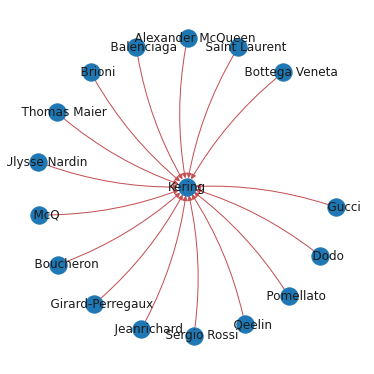

In [33]:
# Network
colors = nx.get_edge_attributes(G1, 'color').values()
plt.figure(figsize=(5,5))
nx.draw_kamada_kawai(G1, with_labels = True, connectionstyle='arc3, rad = 0.1', edge_color=colors)

In [34]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G1)

In [41]:
#Plot for advice netwok
G1_plot = hv.Graph.from_networkx(G1, G_layout).opts(tools=['hover'], directed=True, edge_alpha=0.1, node_size='cent_degree', legend_position='right' )
labels = hv.Labels(G1_plot.nodes, ['x', 'y'], 'index')
show(hv.render(G1_plot * labels.opts(text_font_size='13pt', text_color='black', bgcolor='white')))